In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.multivariate_normal?

In [4]:
mean_1 = np.array([7, 8])
mean_2 = np.array([2, -5])

In [5]:
cov_1 = np.array([[1, 5], [5, 1]])
cov_2 = np.array([[1, 3], [3, 1]])

In [10]:
dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 500)
dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 500)

C:\Users\bhatt\AppData\Local\Temp\ipykernel_33304\1626948445.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_1 = np.random.multivariate_normal(mean_1, cov_1, size = 500)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_33304\1626948445.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  dist_2 = np.random.multivariate_normal(mean_2, cov_2, size = 500)


In [12]:
dist_1.shape, dist_2.shape

((500, 2), (500, 2))

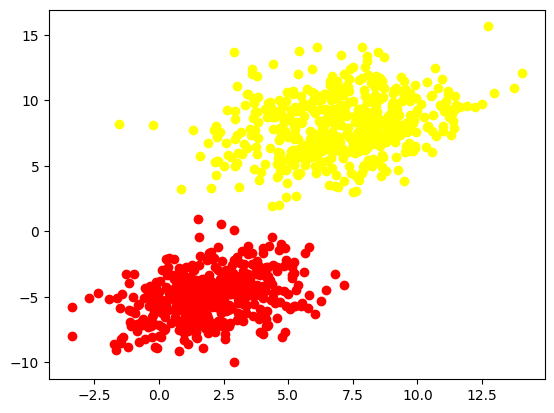

In [13]:
plt.scatter(dist_1[:, 0], dist_1[:, 1], c = 'yellow')
plt.scatter(dist_2[:, 0], dist_2[:, 1], c = 'red')

In [14]:
dataset = np.zeros((1000, 3))
dataset[:500, :2] = dist_1
dataset[500:, :2] = dist_2

dataset[500:, -1] = 1

In [15]:
print(dataset[0])
print(dataset[-1])

[ 4.64077669 10.00987499  0.        ]
[ 3.53799962 -3.89751829  1.        ]


In [16]:
np.random.shuffle(dataset)

In [17]:
print(dataset[:10, ])

[[ 6.26485311  5.3229027   0.        ]
 [ 6.46610422  4.58027256  0.        ]
 [ 3.09467329  3.38872716  0.        ]
 [ 4.40858113 -2.60304189  1.        ]
 [-0.25711394 -4.97098129  1.        ]
 [ 2.50342541 -5.85552584  1.        ]
 [-1.28834566 -3.29330662  1.        ]
 [ 4.82911982  7.41695303  0.        ]
 [ 7.28535764  8.88462114  0.        ]
 [ 3.6218634  10.16493033  0.        ]]


In [18]:
X_train = dataset[:800, :-1]
X_test = dataset[800:, :-1]

Y_train = dataset[:800, -1]
Y_test = dataset[800:, -1]

In [19]:
print(X_test.shape, X_train.shape, Y_test.shape, Y_train.shape)

(200, 2) (800, 2) (200,) (800,)


In [21]:
u = X_train.mean(axis = 0)
std = X_train.std(axis = 0)

In [22]:
X_train = (X_train - u)/std

In [23]:
u = X_test.mean(axis = 0)
std = X_test.std(axis = 0)

In [24]:
X_test = (X_test - u)/std

In [25]:
def hypothesis(X, theta):
    return 1 / (1 + np.exp(-1 * np.dot(X, theta)))

In [26]:
np.dot?

In [27]:
def loss_func(X, Y, weights):
    
    h_x = hypothesis(X, weights)
    loss = np.mean(Y*np.log(h_x) + (1 - Y)*np.log((1 - h_x)))
    
    return -1*loss